# 1. 2 ways of creating plots

Start by importing `Matplotlib` and setting up the `%matplotlib inline` magic command.

In [1]:
# Import matplotlib and setup the figures to display within the notebook
%matplotlib inline
import matplotlib.pyplot as plt

[]

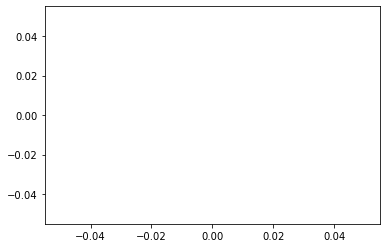

In [2]:
# Create a simple plot, without the semi-colon
plt.plot()

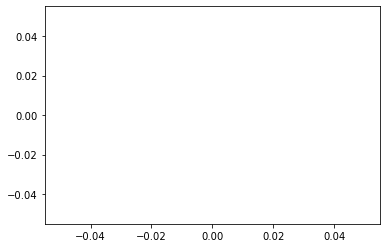

In [3]:
# With the semi-colon
plt.plot();

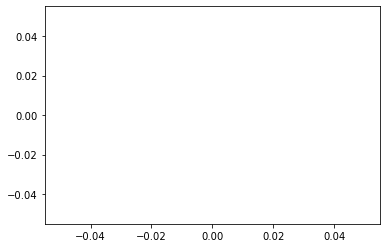

In [4]:
# You could use plt.show() if you want
plt.plot()
plt.show()

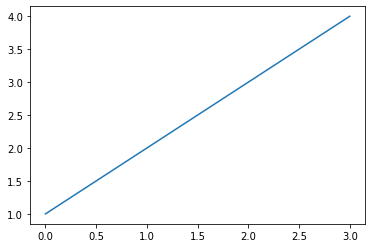

In [6]:
# Let's add some data
plt.plot([1,2,3,4])

In [7]:
# Create some data
x = [1,2,3,4]
y = [11,22,33,44]

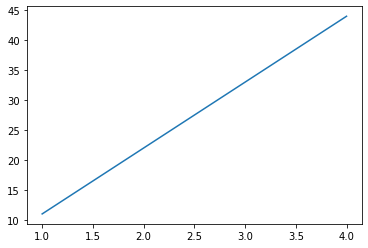

In [8]:
# With a semi-colon and now a y value
plt.plot(x,y);

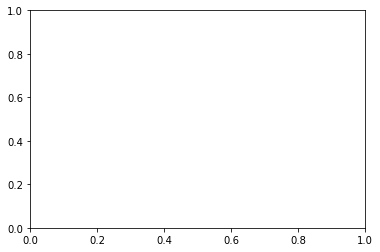

In [9]:
# Creating a plot with the OO verison, confusing way first
fig = plt.figure()
ax = fig.add_subplot()
plt.show()

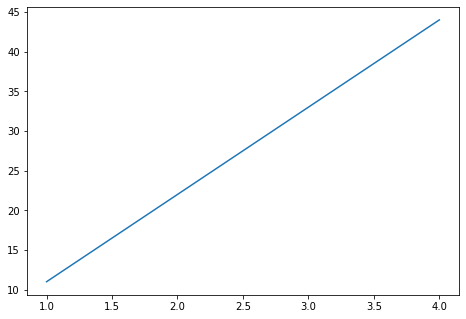

In [12]:
# Confusing #2
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

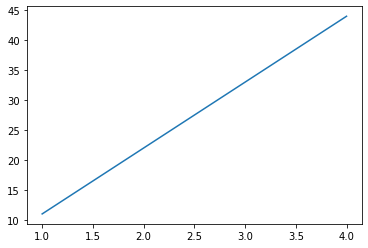

In [13]:
# Easier and more robust going forward (what we're going to use)
fig, ax = plt.subplots()
ax.plot(x,y);

### -> Show figure/plot anatomy here <-

In [14]:
# This is where the object orientated name comes from 
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

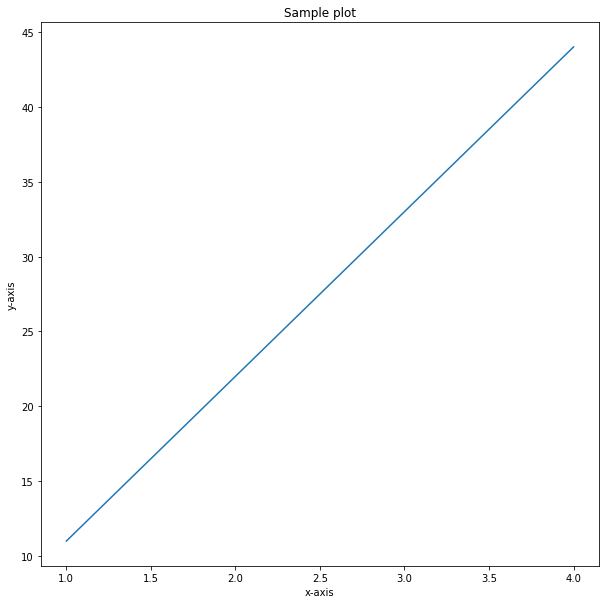

In [18]:
# A matplotlib workflow

# 0. Import and get matplotlib ready
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10,10))

# 3. Plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title = "Sample plot",
      xlabel = "x-axis",
      ylabel = "y-axis");

# 5. Save & show
#fig.savefig("../images/simple-plot.png")

# 2. Making the most common type of plots using NumPy arrays

* `line`
* `scatter`
* `bar`
* `hist`
* `subplots()`
To make sure we have access to `NumPy`, we'll import it as `np`.

In [19]:
import numpy as np

### Line

Line is the default type of visualization in Matplotlib. Usually, unless specified otherwise, your plots will start out as lines.


In [21]:
# Create an array
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

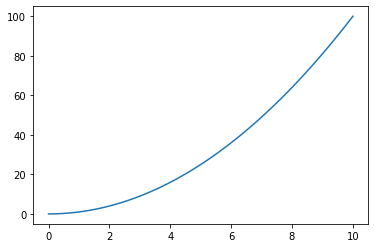

In [23]:
# The default plot is line
fig, ax = plt.subplots()
ax.plot(x, x**2);

### Scatter

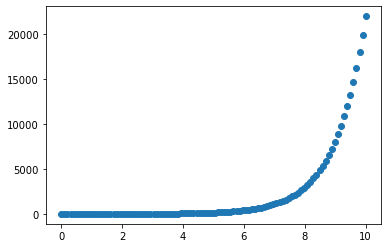

In [24]:
# Need to recreate our figure and axis instances when we want a new figure
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

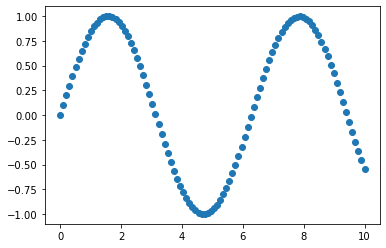

In [25]:
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

### Bar

* Vertical
* Horizontal

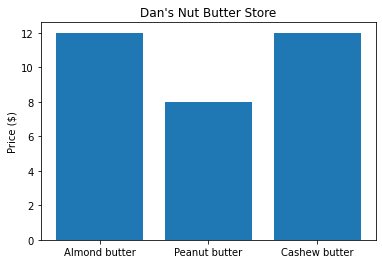

In [28]:
# You can make plots from a dictionary
nut_butter_prices = {"Almond butter" : 12,
                     "Peanut butter" : 8,
                     "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store", ylabel = "Price ($)");

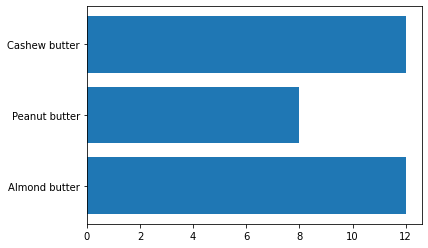

In [32]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

### Histogram (hist)
* Could show image of normal distribution here

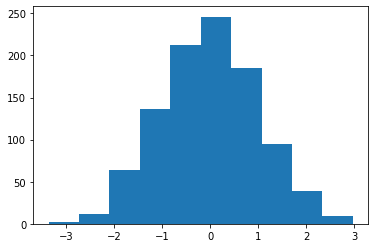

In [34]:
# Make some data from a normal distribution
x = np.random.randn(1000)     # pulls data from a normal distribution

fig, ax = plt.subplots()
ax.hist(x);

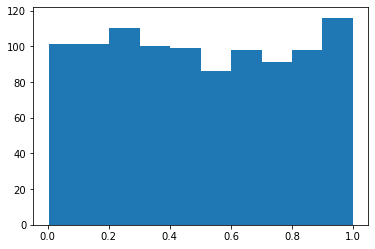

In [35]:
x = np.random.random(1000) # random data from random distribution

fig, ax = plt.subplots()
ax.hist(x);

### Subplots

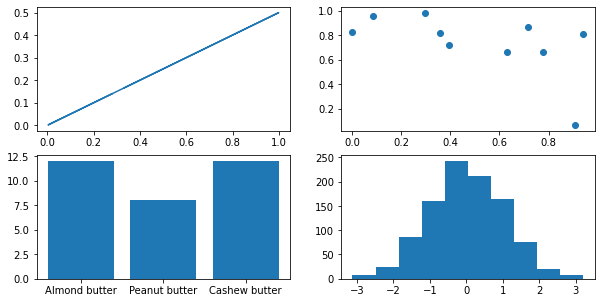

In [40]:
# Option 1: Create multiple subplots
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows = 2,
                                             ncols = 2,
                                             figsize = (10,5))

# Plot data to each axis
ax0.plot(x, x/2);
ax1.scatter(np.random.random(10), np.random.random(10));
ax2.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax3.hist(np.random.randn(1000));

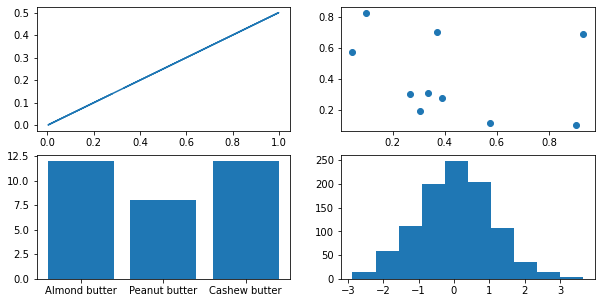

In [41]:
# Option 2: Create multiple subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

# Index to plot data
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

# 3. Plotting data directly with pandas

This section uses the pandas `pd.plot()` method on a DataFrame to plot columns directly.

* `line`
* `scatter`
* `bar`
* `hist`
* `df.plot(subplots=True, figsize=(6, 6))`

To plot data with pandas, we first have to import it as `pd`.

In [42]:
import pandas as pd

In [43]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("car_sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


### Line

In [44]:
# Start with some dummy data
ts =  pd.Series(np.random.randn(1000), 
               index = pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01   -1.467081
2020-01-02    0.136081
2020-01-03   -0.978822
2020-01-04    0.076820
2020-01-05   -0.863911
                ...   
2022-09-22    0.843268
2022-09-23    0.133513
2022-09-24    0.115666
2022-09-25   -2.704402
2022-09-26   -0.404895
Freq: D, Length: 1000, dtype: float64

In [45]:
# What does cumsum() do?
ts.cumsum()

2020-01-01    -1.467081
2020-01-02    -1.331000
2020-01-03    -2.309822
2020-01-04    -2.233003
2020-01-05    -3.096914
                ...    
2022-09-22   -11.134915
2022-09-23   -11.001402
2022-09-24   -10.885736
2022-09-25   -13.590138
2022-09-26   -13.995033
Freq: D, Length: 1000, dtype: float64

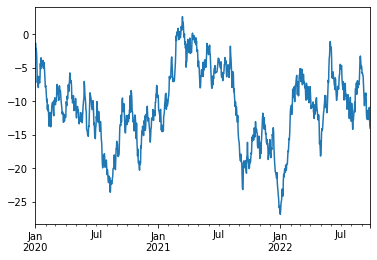

In [47]:
ts.cumsum().plot();

### Working with actual data


Let's do a little data manipulation on our `car_sales` DataFrame

In [49]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [50]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

C:\Users\BILAL\AppData\Local\Temp\ipykernel_3480\2276578600.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [51]:
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [52]:
car_sales["Sale Date"] = pd.date_range('1/1/2020', periods = len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [56]:
# Make total sales column (doesn't work, adds as string)
#car_sales["Total Sales"] = car_sales["Price"].cumsum()

# Oops... want them as int's not string
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


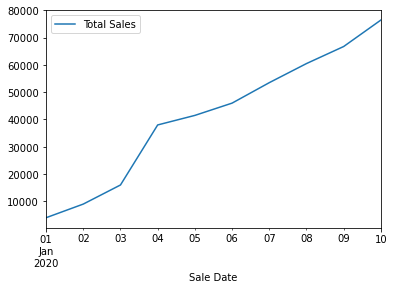

In [57]:
car_sales.plot(x="Sale Date", y="Total Sales");

### Scatter

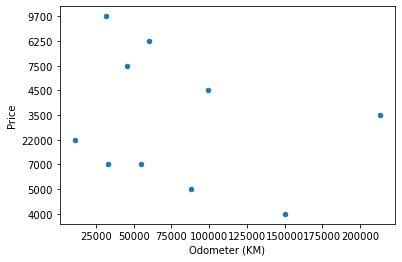

In [59]:
# It works because we converted price into an int datatype
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

### Bar

In [60]:
x = np.random.rand(10,4)
x

array([[0.3530747 , 0.09056692, 0.48174359, 0.8968727 ],
       [0.34178558, 0.6274525 , 0.46694427, 0.68997002],
       [0.13108845, 0.10736498, 0.96083456, 0.240805  ],
       [0.48054027, 0.50080491, 0.13611059, 0.33509204],
       [0.68198473, 0.11786362, 0.73755382, 0.2697999 ],
       [0.2094808 , 0.66501732, 0.6784442 , 0.55394171],
       [0.17478104, 0.34822056, 0.27578434, 0.08848285],
       [0.12554331, 0.91058808, 0.6761281 , 0.09976671],
       [0.63699703, 0.47830748, 0.74212628, 0.23142334],
       [0.30018543, 0.47890807, 0.61214183, 0.18809204]])

In [61]:
df = pd.DataFrame(x, columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.353075,0.090567,0.481744,0.896873
1,0.341786,0.627453,0.466944,0.689970
2,0.131088,0.107365,0.960835,0.240805
3,0.480540,0.500805,0.136111,0.335092
4,0.681985,0.117864,0.737554,0.269800
5,0.209481,0.665017,0.678444,0.553942
6,0.174781,0.348221,0.275784,0.088483
7,0.125543,0.910588,0.676128,0.099767
8,0.636997,0.478307,0.742126,0.231423
9,0.300185,0.478908,0.612142,0.188092


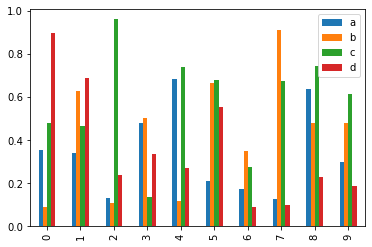

In [62]:
df.plot.bar();

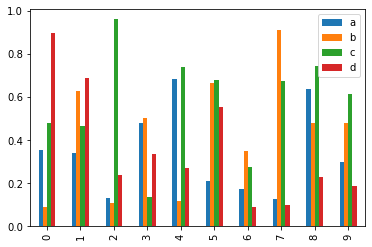

In [65]:
# Can do the same thing with 'kind' keyword
df.plot(kind="bar");

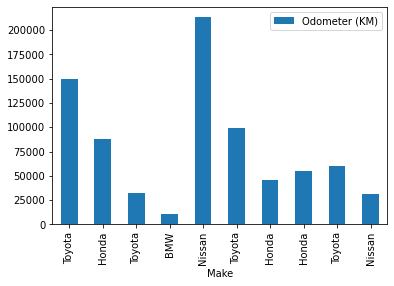

In [67]:
car_sales.plot(x="Make", y="Odometer (KM)", kind='bar');

### Histograms

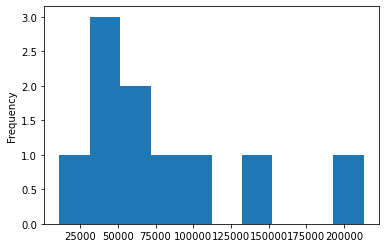

In [69]:
car_sales["Odometer (KM)"].plot(kind='hist');

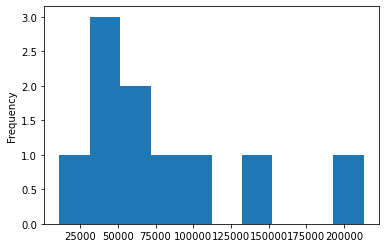

In [71]:
car_sales["Odometer (KM)"].plot.hist();

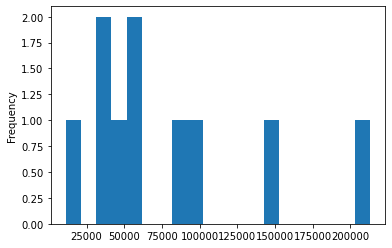

In [73]:
# Default number of bins is 10 
car_sales["Odometer (KM)"].plot.hist(bins = 20);

In [75]:
# Let's try with another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


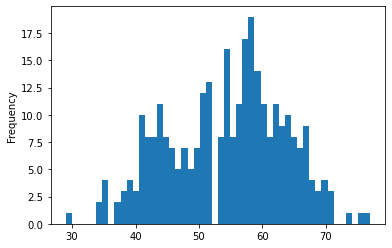

In [77]:
heart_disease["age"].plot.hist(bins = 50);

### Subplots

In [78]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


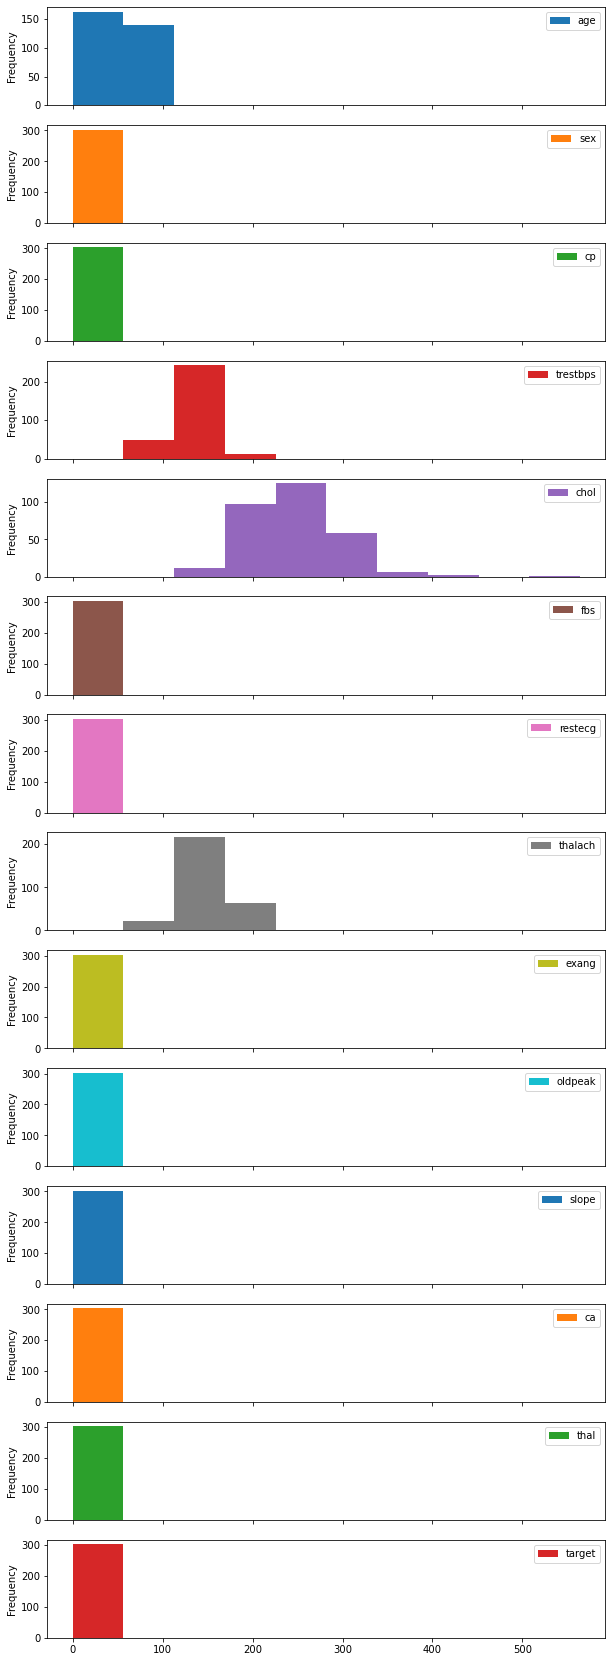

In [79]:
heart_disease.plot.hist(figsize=(10,30), subplots = True);

# 4. Plotting with pandas using the OO method


For more complicated plots, you'll want to use the OO method.



In [83]:
# Perform data analysis on patients over 50
over_50 = heart_disease[heart_disease["age"] > 50]
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


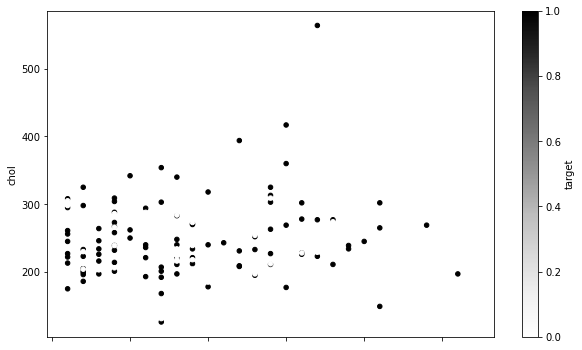

In [84]:
over_50.plot(kind = 'scatter',
            x = "age",
            y = "chol",
            c = "target",
            figsize = (10,6));

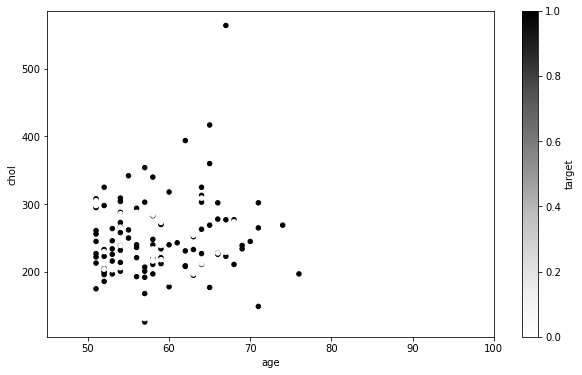

In [85]:
fig, ax = plt.subplots(figsize = (10,6))
over_50.plot(kind = 'scatter',
            x = "age",
            y = "chol",
            c = "target",
            figsize = (10,6),
            ax=ax)
ax.set_xlim([45, 100]);

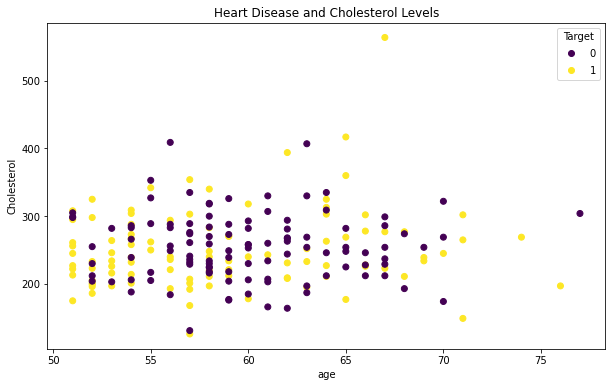

In [88]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(over_50["age"],
                     over_50["chol"],
                     c = over_50["target"],
                    )

# Customize the plot
ax.set(title = "Heart Disease and Cholesterol Levels",
       xlabel = "age",
       ylabel = "Cholesterol")
ax.legend(*scatter.legend_elements(), title = "Target");

What if we wanted a horizontal line going across with the mean of `heart_disease["chol"]`?

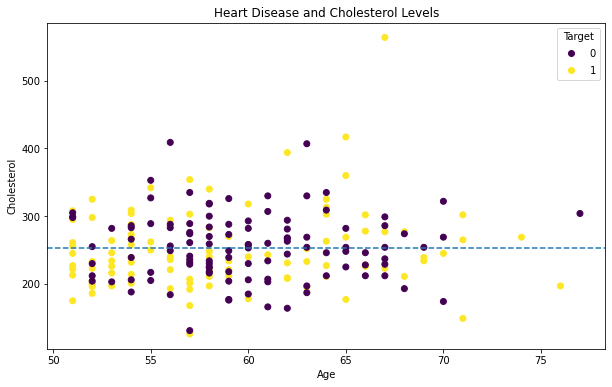

In [91]:
# Make a bit more of a complicated plot

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax.axhline(over_50["chol"].mean(),
           linestyle = "--");

### Adding another plot to existing styled one

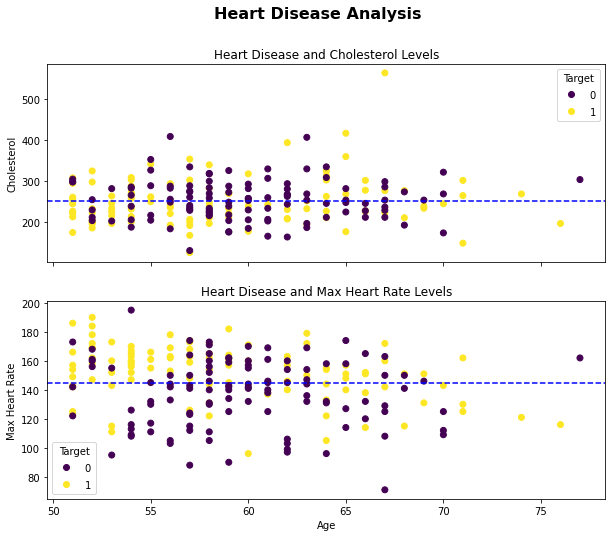

In [92]:
# Setup plot (2 rows, 1 column)
fig, (ax0, ax1) = plt.subplots(nrows=2, # 2 rows
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 8))

# Add data for ax0
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"])
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")
ax0.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")


# Add data for ax1
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"])

# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")
ax1.legend(*scatter.legend_elements(), title="Target")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='b', 
            linestyle='--', 
            label="Average")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

# 5. Customizing your plots

* `limits (xlim, ylim)`, `colors`, `styles`, `legends`

### Style

In [93]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

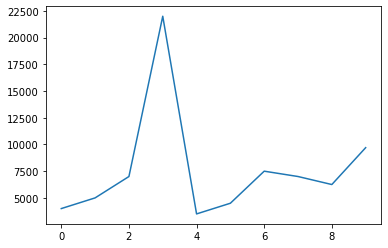

In [95]:
# Plot before changing style
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales["Price"].plot();

In [96]:
# Change the style... 
plt.style.use('seaborn-whitegrid')

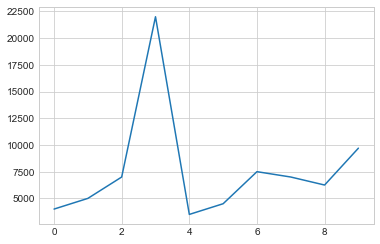

In [97]:
# Plot after changing style
car_sales["Price"].plot();

In [98]:
plt.style.use('seaborn')

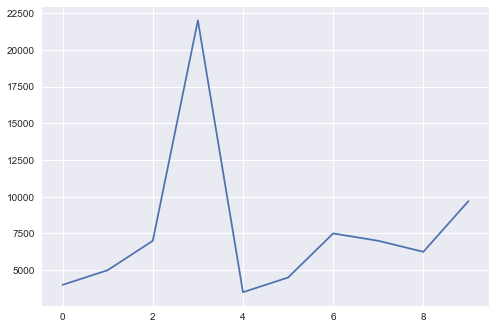

In [99]:
car_sales["Price"].plot();

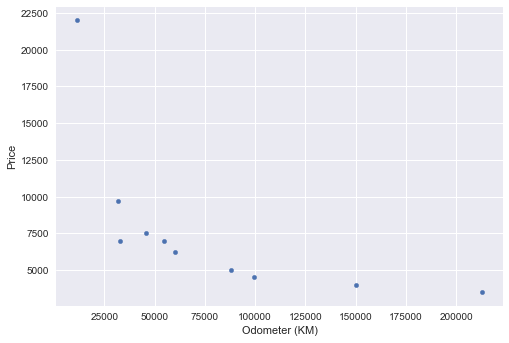

In [100]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [101]:
plt.style.use('ggplot')

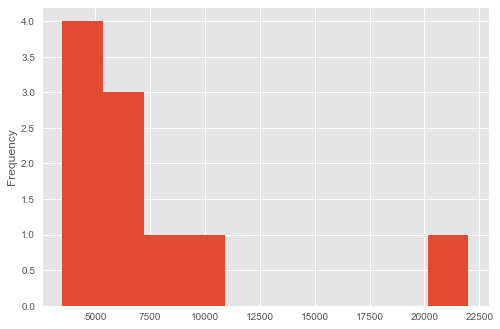

In [103]:
car_sales["Price"].plot.hist();

## Changing the title, legend, axes

In [104]:
x = np.random.randn(10,4)
x

array([[ 0.4290279 ,  2.44373729,  0.46156832, -1.16758095],
       [ 0.28154464, -0.68166207,  1.30214996, -0.97300068],
       [-0.32756644,  1.29216883, -1.74582466,  1.71464037],
       [-0.56089572, -0.40158259,  0.08148846,  0.92410893],
       [ 0.33324666, -0.03366401, -0.51550093,  1.52184081],
       [-1.80044034, -1.42349001, -0.25095931, -1.16685337],
       [ 0.18470686,  0.39232828, -1.36356732, -1.18777036],
       [ 1.08160836,  1.14578522,  0.3364036 , -0.2572506 ],
       [-0.09771146, -1.19035096,  1.25836259,  0.95460122],
       [ 0.03268135,  0.48069884,  0.89364324,  0.01534099]])

In [106]:
df = pd.DataFrame(x, columns = ['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.429028,2.443737,0.461568,-1.167581
1,0.281545,-0.681662,1.302150,-0.973001
2,-0.327566,1.292169,-1.745825,1.714640
3,-0.560896,-0.401583,0.081488,0.924109
4,0.333247,-0.033664,-0.515501,1.521841
5,-1.800440,-1.423490,-0.250959,-1.166853
6,0.184707,0.392328,-1.363567,-1.187770
7,1.081608,1.145785,0.336404,-0.257251
8,-0.097711,-1.190351,1.258363,0.954601
9,0.032681,0.480699,0.893643,0.015341


matplotlib.axes._subplots.AxesSubplot

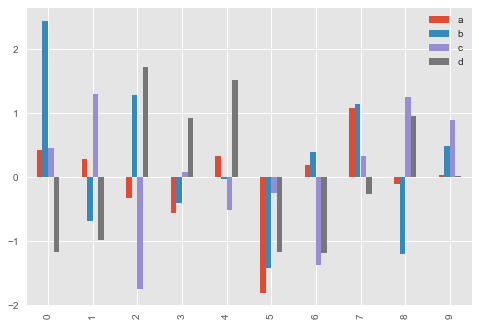

In [108]:
ax = df.plot(kind = 'bar')
type(ax)

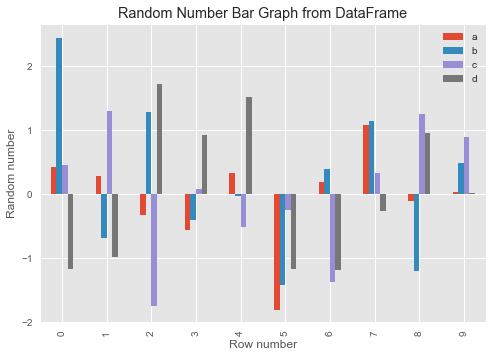

In [109]:
ax = df.plot(kind = 'bar')
ax.set(title = "Random Number Bar Graph from DataFrame",
       xlabel = "Row number",
       ylabel = "Random number")
ax.legend().set_visible(True)

## Changing the cmap


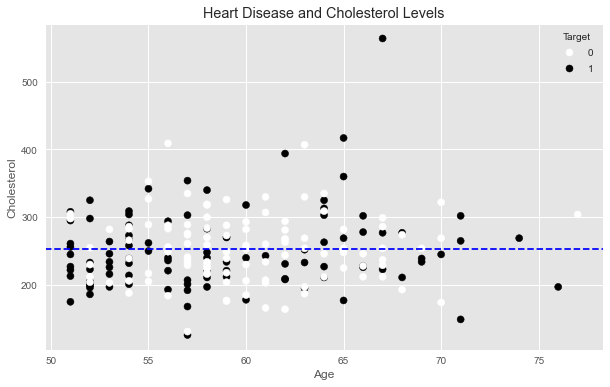

In [110]:
# No cmap change
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"])
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol");
ax.axhline(y=over_50["chol"].mean(), 
           c='b', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

In [111]:
plt.style.use('seaborn-whitegrid')

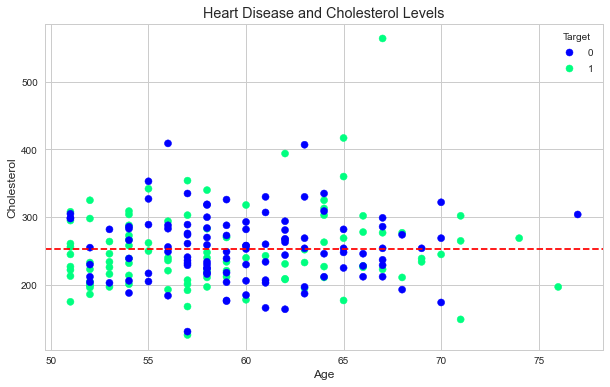

In [114]:
# Change cmap and horizontal line to be a different colour

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(over_50["age"], 
                     over_50["chol"], 
                     c=over_50["target"], 
                     cmap="winter")
ax.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
ax.axhline(y=over_50["chol"].mean(), 
           color='r', 
           linestyle='--', 
           label="Average");
ax.legend(*scatter.legend_elements(), title="Target");

## Changing the xlim & ylim


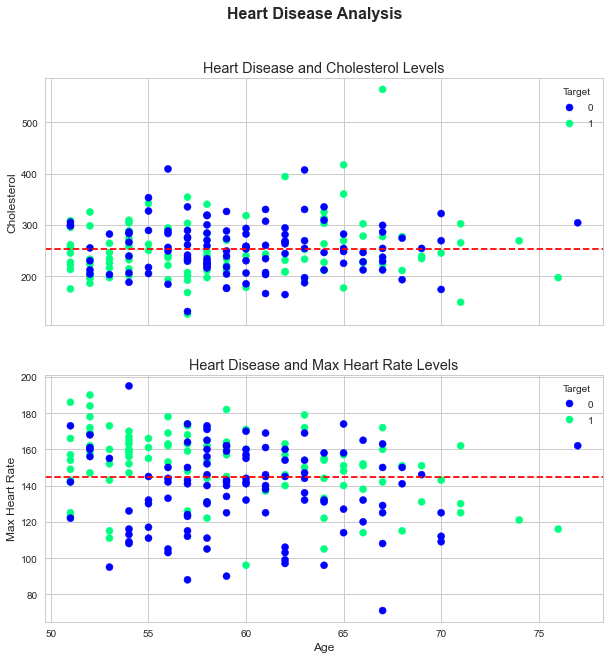

In [115]:
## Before the change (we've had color updates)

fig, (ax0, ax1) = plt.subplots(nrows=2, 
                               ncols=1, 
                               sharex=True, 
                               figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

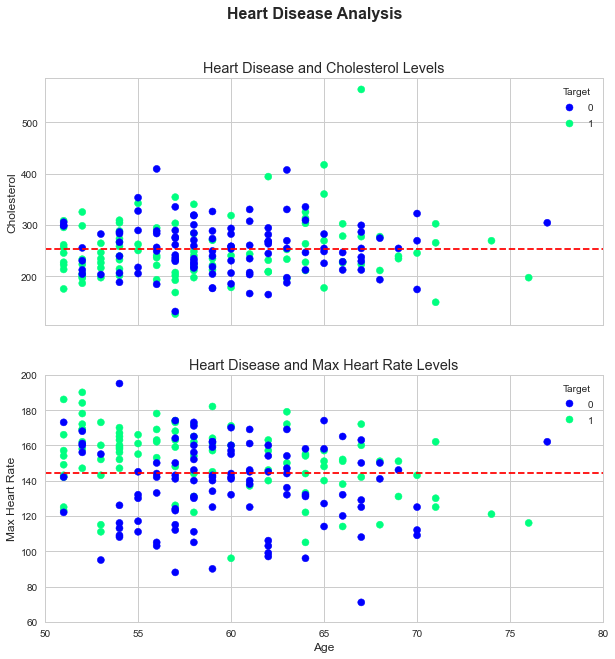

In [116]:
## After adding in different x & y limitations

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim(50,80)

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

## 6. Saving plots


Saving plots to images using `figsave()`


If you're doing something like this often, to save writing excess code, you might put it into a function.

A function which follows the Matplotlib workflow.

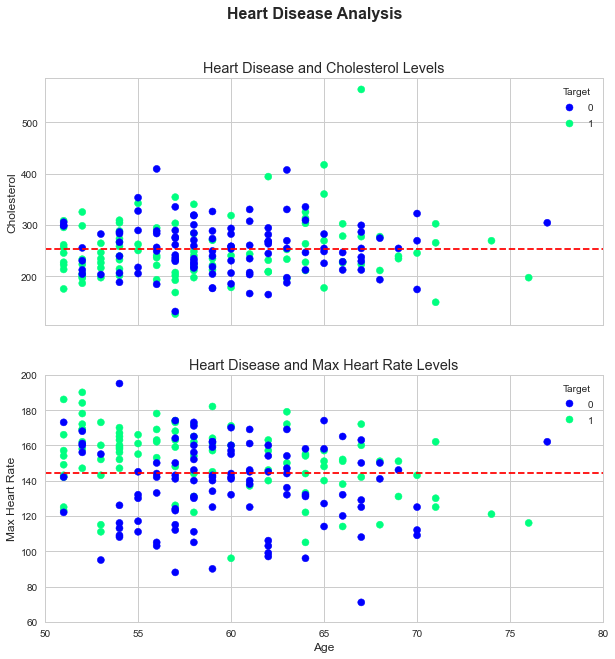

In [117]:
# Axis 0, 1 (row 0, column 0)
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');

In [118]:
# Check the supported filetypes
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

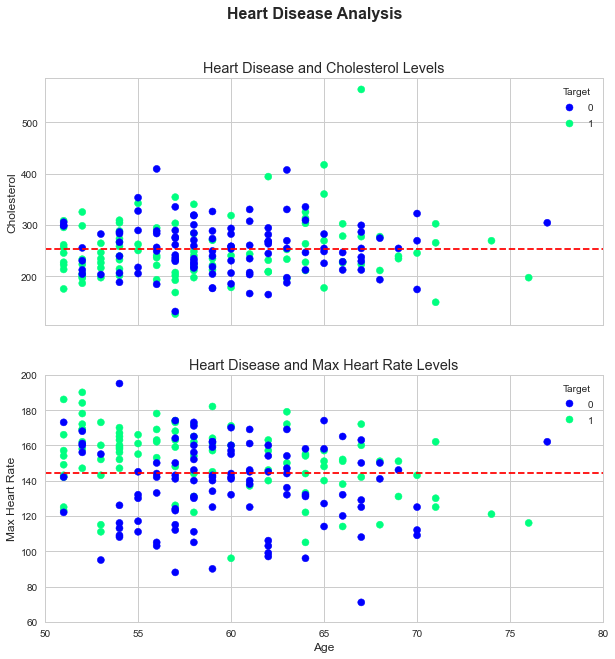

In [119]:
fig

In [132]:
# Save the file
fig.savefig("C:\\Users\\BILAL\\Desktop\\ml-course\\sample-project\\images\\heart-disease-analysis.png")

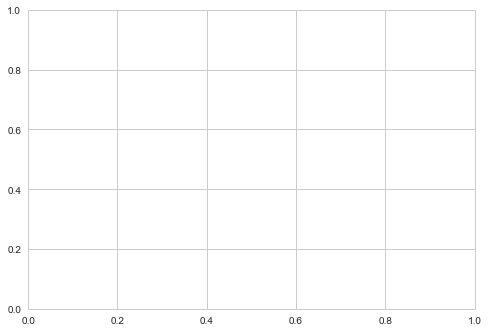

In [122]:
# Resets figure
fig, ax = plt.subplots()

In [123]:
# Potential function

def plotting_workflow(data):
    # 1. Manipulate data
    
    # 2. Create plot
    
    # 3. Plot data
    
    # 4. Customize plot
    
    # 5. Save plot
    
    # 6. Return plot
    
    return plot